**DATA EXPLORATION**

In this notebook we're going analyze the dataset in order to better understand the data and organize the work-flow.

In [1]:
import pandas as pd
import numpy as np

We extracted the .csv files from the Emotions_GoldStandard_andAnnotation.xlsx. We have a .csv file for each emotion, extracted from each worksheet on the xlsx file, using the package pandas. We did another script for completing this task.

In [2]:
emotions = ['love','anger','fear','surprise','joy','sadness']


df_love = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/love.csv',sep=';',encoding='iso-8859-1')

df_anger = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/anger.csv',sep=';',encoding='iso-8859-1')

df_fear = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/fear.csv',sep=';',encoding='iso-8859-1')

df_surprise = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/surprise.csv',sep=';',encoding='iso-8859-1')

df_joy = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/joy.csv',sep=';',encoding='iso-8859-1')

df_sadness = pd.read_csv('C:/users/kecco/Documenti/Github/DataMining-EmotionDetection/data/Processed/Dataset/StackOverflow/sadness.csv',sep=';',encoding='iso-8859-1')

We have the same sentences over the 6 csv files. In each of them, in the label column, we have the name of emotion if it is related to the sentence, or NaN otherwise.

In [3]:
print('\nLOVE DATAFRAME')
print(df_love.head())

print('\nJOY DATAFRAME')
print(df_joy.head())


LOVE DATAFRAME
                                                Text label
0  SVG transform on text attribute works excellen...  LOVE
1  Excellent! This is exactly what I needed. Thanks!  LOVE
2  Have added a modern solution as of May 2014 in...   NaN
3  Have you tried removing 'preload' attribute? (...   NaN
4  A smarter, entirely C++-way of doing what you ...   NaN

JOY DATAFRAME
                                                Text label
0  SVG transform on text attribute works excellen...   NaN
1  Excellent! This is exactly what I needed. Thanks!   NaN
2  Have added a modern solution as of May 2014 in...   NaN
3  Have you tried removing 'preload' attribute? (...   NaN
4  A smarter, entirely C++-way of doing what you ...   NaN


We need to analyze the classes distribution and total nunmber of samples.

In [4]:
print('Total number of sentences')
num_sentences = len(df_joy)
print(num_sentences)
emotions = ['joy','sadness','fear','surprise','anger','love']

df_list = [df_joy,df_sadness,df_fear,df_surprise,df_anger,df_love]

num_occurences = []

for i,df in enumerate(df_list):
    print(f'Number of {emotions[i].upper()} occurences: ')
    print(df['label'].value_counts()[emotions[i].upper()])
    num_occurences.append(df['label'].value_counts()[emotions[i].upper()])

Total number of sentences
4800
Number of JOY occurences: 
491
Number of SADNESS occurences: 
230
Number of FEAR occurences: 
106
Number of SURPRISE occurences: 
45
Number of ANGER occurences: 
882
Number of LOVE occurences: 
1220


<Axes: title={'center': 'Emotions Distributions over the Dataset'}>

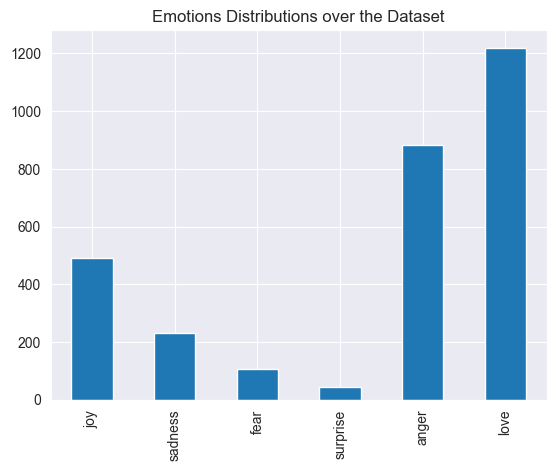

In [5]:
ser = pd.Series(data=num_occurences, index=emotions)
ser.plot(kind='bar',title = 'Emotions Distributions over the Dataset')

The classes are not equally distributed. We have a large gap between the less represented class, Surprise, and the most represented one, Love.
Moreover, there is a large difference in each csv between the nuber of non-relevant sentences and the emotive ones.
So, in th next phases, we will focus on this aspect.

We'll use spacy package for nlp in python. It provides a huge number of features and tools for working with text data.

In [6]:
!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")


     --------------------------------------- 12.8/12.8 MB 28.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


The dataset contains StackOverflow comments, usually they are not too long, as we can see.

In [8]:
tot = len(df_anger['Text'])
l = 0

for sentence in df_anger['Text']:
    doc=nlp(sentence)
    l += len(doc)

print(f'Mean number of words:{l/tot}')

Mean number of words:36.69229166666667


But every sentence could be associated with more than one sentiment. We create a dataset with emotions as columns and 1 row for each sentence. The 1 in a cell indicates the presence of that sentiment in a sentence.

In [12]:
emotions = ['joy','sadness','fear','surprise','anger','love']
row = {'joy':0,'sadness':0,'fear':0,'surprise':0,'anger':0,'love':0}
data =[]


for i in range(len(df_joy)):
    app = row.copy()
    for j,df in enumerate(df_list):
        if df.loc[i,'label'] == emotions[j].upper():
            app[emotions[j]] = 1
    data.append(app)

df_results = pd.DataFrame(data=data,columns=emotions)

print(df_results)

      joy  sadness  fear  surprise  anger  love
0       0        0     0         0      0     1
1       0        0     0         0      0     1
2       0        0     0         0      0     0
3       0        1     0         0      0     0
4       0        0     0         0      0     0
...   ...      ...   ...       ...    ...   ...
4795    1        0     0         0      0     0
4796    0        0     0         0      0     1
4797    0        0     0         0      0     0
4798    0        0     0         0      0     1
4799    0        0     0         0      0     0

[4800 rows x 6 columns]


We add a column named 'tot' to count the number of sentiments in the same sentence.

In [13]:
tot_col = np.sum(df_results,axis=1).tolist()

df_results['tot'] = tot_col

print(df_results)


      joy  sadness  fear  surprise  anger  love  tot
0       0        0     0         0      0     1    1
1       0        0     0         0      0     1    1
2       0        0     0         0      0     0    0
3       0        1     0         0      0     0    1
4       0        0     0         0      0     0    0
...   ...      ...   ...       ...    ...   ...  ...
4795    1        0     0         0      0     0    1
4796    0        0     0         0      0     1    1
4797    0        0     0         0      0     0    0
4798    0        0     0         0      0     1    1
4799    0        0     0         0      0     0    0

[4800 rows x 7 columns]


With the next script, we count the number of sentences with more than one sentiment, and we create a dict object with as index the index of the sentence, and value the name of sentiments associated

In [16]:
count = 0
dict_final = {}

for i in range (len(df_results)):
    if df_results.loc[i,'tot'] > 1:
        string = ''
        for e in emotions:
            if df_results.loc[i,e] == 1:
                string = string + e +','
        dict_final[i] = string
        count += 1

print(f'Number of sentences with more than one sentiment:{count}')

Number of sentences with more than one sentiment:133


We grouped same couple of sentiments in another dict

In [18]:
from collections import defaultdict

dict_final = defaultdict(int)

for i in range (len(df_results)):
    if df_results.loc[i,'tot'] > 1:
        string = ''
        for e in emotions:
            if df_results.loc[i,e] == 1:
                string = string + e +','
        dict_final[string] += 1

print(dict_final)
print(len(dict_final))

defaultdict(<class 'int'>, {'joy,love,': 71, 'joy,fear,': 2, 'sadness,anger,': 11, 'sadness,fear,': 10, 'joy,surprise,': 6, 'anger,love,': 13, 'surprise,love,': 4, 'surprise,anger,': 2, 'joy,sadness,': 4, 'fear,anger,': 1, 'joy,anger,': 4, 'fear,surprise,': 2, 'sadness,love,': 2, 'sadness,surprise,': 1})
14


As we can see from the plot, joy and love is the more frequent couple, understandably, but we have also some strange couple of sentiments, as joy and sadness, or joy and fear, in some sentences.

<Axes: title={'center': 'Emotions Distributions over the Dataset'}>

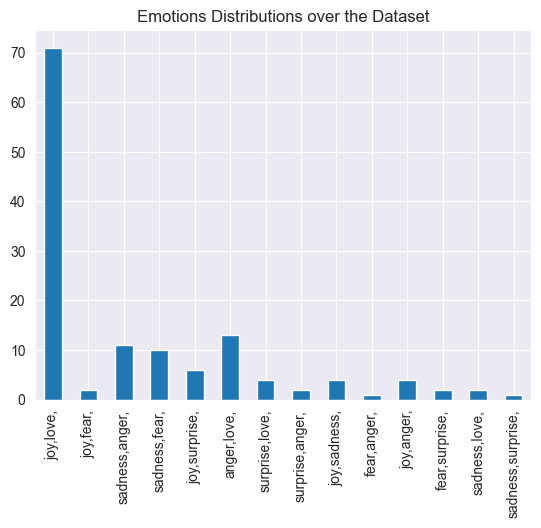

In [19]:
ser = pd.Series(dict_final)
ser.plot(kind='bar',title = 'Emotions Distributions over the Dataset')

### Sum up
-  We have a total of 4800 sentences labeled on 6 sentiments.
-  'love' is the more represented one, with 1200 samples, but we have some sentiments, like surprise and fear, that have less than 200 samples, maybe not too much for training a classification model.
-  Even considering the most represented ones, the dataset is highly unbalanced, so we will use some balancing techniques in the next steps.
-  Sentences have a mean number of words of about 37
-  133 sentences have been labeled with more than one sentiment, sometimes correlated, as love and joy, sometimes not.
-  This may be due to the fact that sentiments and feelings change a lot from one to another, and so the samples in our dataset.